# Information
$Logistic\ regression\ for\ a\ binary\ classification$<br>
<hr>

# Library

In [1]:
import matplotlib.pyplot as plt; import numpy as np;

#Data


In [2]:
path="data.txt"
data    = np.genfromtxt(path, delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

m = label.size

#Logistic regression

$\hat{h} = \sigma(z)$<br>
$z = \theta_0 + \theta_1 x + \theta_2 y$, where $\theta_0, \theta_1, \theta_2 \in \mathbb{R}$<br>
$\sigma(z) = \frac{1}{1 + \exp(-z)}$<br>
$\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$<br><br>

$Initial State$<br>
${\theta}_0 = -18$<br>
${\theta}_1 = -0.5$<br>
${\theta}_2 = 0.5$

In [3]:
theta0 = -18; theta0_old = 0
theta1 = -0.5; theta1_old = 0
theta2 = 0.5; theta2_old = 0
theta0_history = [theta0]
theta1_history = [theta1]
theta2_history = [theta2]

z = theta0 + theta1*x + theta2*y
sigma = 1/(1 + np.exp(-z))
sigma_ = sigma * (1-sigma)

# Objective Function
$J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$

In [4]:
j = np.sum(-label*np.log(sigma) - (1-label)*np.log(1-sigma)) / m
j_old = 0
j_history = [j]

# Training Process - Gradient Descent
${\alpha} = 0.002$<br>
$\theta_0^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)})$<br>
$\theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) x^{(i)}$<br>
$\theta_2^{(t+1)} = \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) y^{(i)}$

In [5]:
alpha = 0.002

# Check the number of iteration
iteration = 1

# Set the two condition because it spent too much time for converge
while  (iteration < 1048576):
    # Calculate the theta
    theta0_old = theta0
    theta1_old = theta1
    theta2_old = theta2
    theta0 = theta0 - alpha*np.sum(sigma-label)/m
    theta1 = theta1 - alpha*np.sum((sigma-label)*x)/m
    theta2 = theta2 - alpha*np.sum((sigma-label)*y)/m

    # Update the j
    j_old = j
    z = theta0 + theta1*x + theta2*y
    sigma = 1/(1 + np.exp(-z))
    j = np.sum(-label*np.log(sigma) - (1-label)*np.log(1-sigma)) / m

    # Record the history of parameter
    theta0_history.append(theta0)
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    j_history.append(j)

    iteration = iteration +1


KeyboardInterrupt: 


#Check the Convergence

In [6]:
# Iteration
print("# Iteration: " + str(iteration) + '\n')

# Theta 0
print("Updated Theta0: "+ str(theta0))
print("Old Theta0: " + str(theta0_old))
print("Diff: " + str(theta0 - theta0_old) + '\n')

# Theta 1
print("Updated Theta1: "+ str(theta1))
print("Old Theta1: " + str(theta1_old))
print("Diff: " + str(theta1 - theta1_old) + '\n')

# Theta 2
print("Updated Theta1: "+ str(theta2))
print("Old Theta1: " + str(theta2_old))
print("Diff: " + str(theta2 - theta2_old) + '\n')

# J, Energy Value
print("Updated J: "+ str(j))
print("Old J: " + str(j_old))
print("Diff: " + str(j - j_old) + '\n')

# Iteration: 8388608

Updated Theta0: -25.127131921679986
Old Theta0: -25.12713190130285
Diff: -2.037713642266681e-08

Updated Theta1: 0.205958132159925
Old Theta1: 0.2059581319969281
Diff: 1.6299689375998128e-10

Updated Theta1: 0.20119486478669513
Old Theta1: 0.2011948646218168
Diff: 1.648783332086623e-10

Updated J: 0.20349787574298517
Old J: 0.2034978757431929
Diff: -2.077227279073668e-13



#Generate the grid
x = [30 : 0.5 : 100]<br>
y = [30 : 0.5 : 100]


In [ ]:
x_range = np.arange(30, 100.5, 0.5)
y_range = np.arange(30, 100.5, 0.5)
x_grid, y_grid = np.meshgrid(x_range, y_range)
classifier_colormap = 1/(1 + np.exp(-theta0 - theta1*x_grid - theta2*y_grid))

#1. Training Data

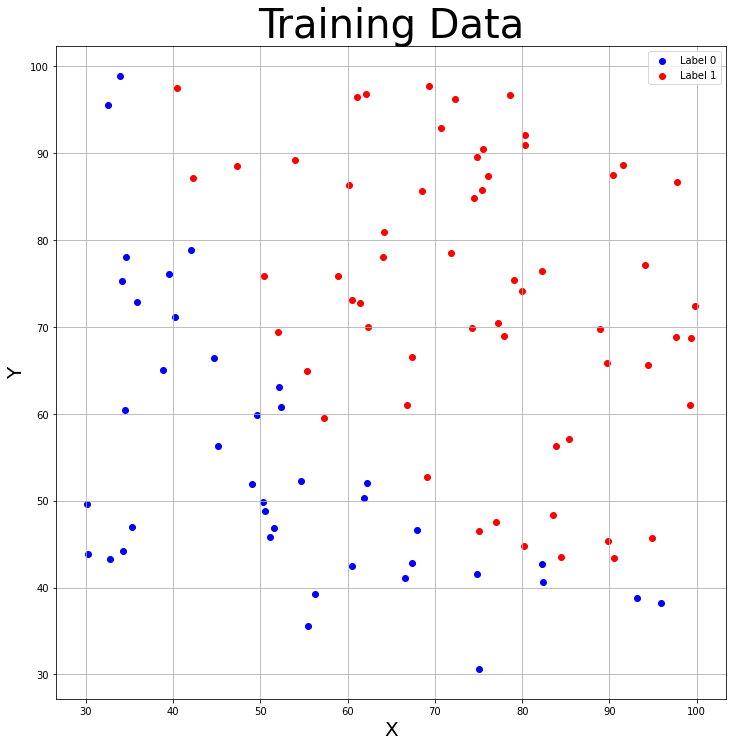

In [8]:
plt.figure(figsize=(12,12))
plt.scatter(x_label0, y_label0, c='b', label='Label 0')
plt.scatter(x_label1, y_label1, c='r', label='Label 1')
plt.grid()
plt.legend()
plt.title('Training Data', fontsize=40)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()

#2. Estimated Parameters

Text(0, 0.5, 'Theta Value')

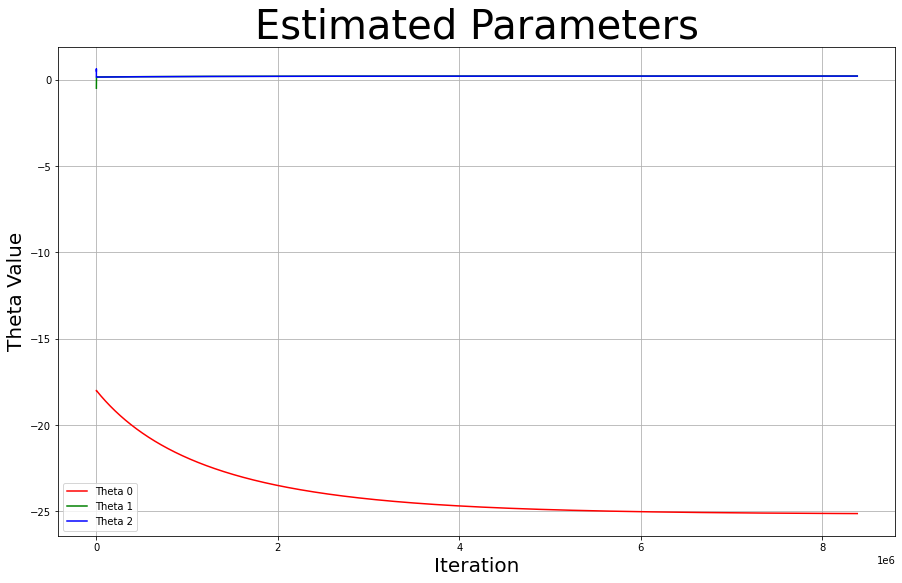

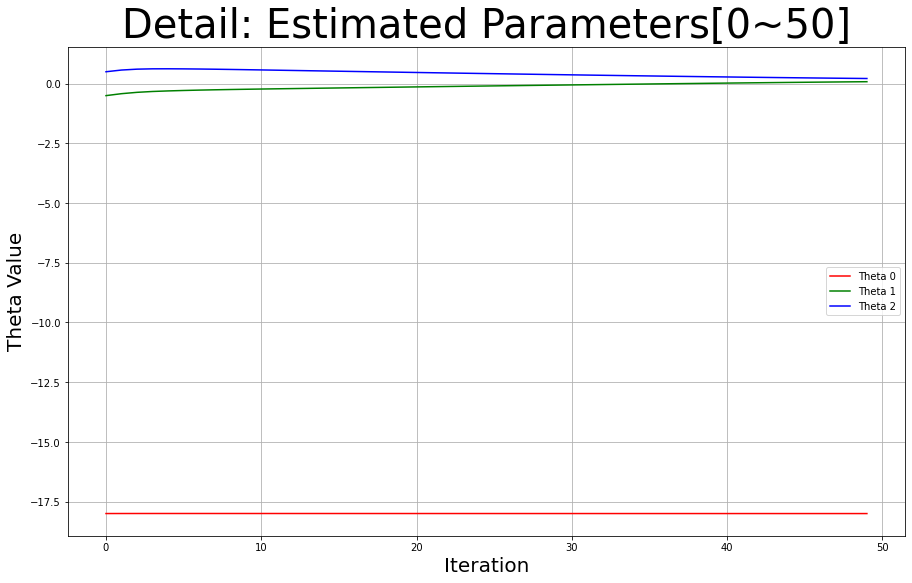

In [9]:
plt.figure(figsize=(15,9))
plt.plot(theta0_history, color='red', label='Theta 0')
plt.plot(theta1_history, color='green', label='Theta 1')
plt.plot(theta2_history, color='blue', label='Theta 2')
plt.grid()
plt.legend()
plt.title('Estimated Parameters', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Theta Value', fontsize=20)


plt.figure(figsize=(15,9))
plt.plot(theta0_history[0:50], color='red', label='Theta 0')
plt.plot(theta1_history[0:50], color='green', label='Theta 1')
plt.plot(theta2_history[0:50], color='blue', label='Theta 2')
plt.grid()
plt.legend()
plt.title('Detail: Estimated Parameters[0~50]', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Theta Value', fontsize=20)

#3. Training Error

Text(0, 0.5, 'Error')

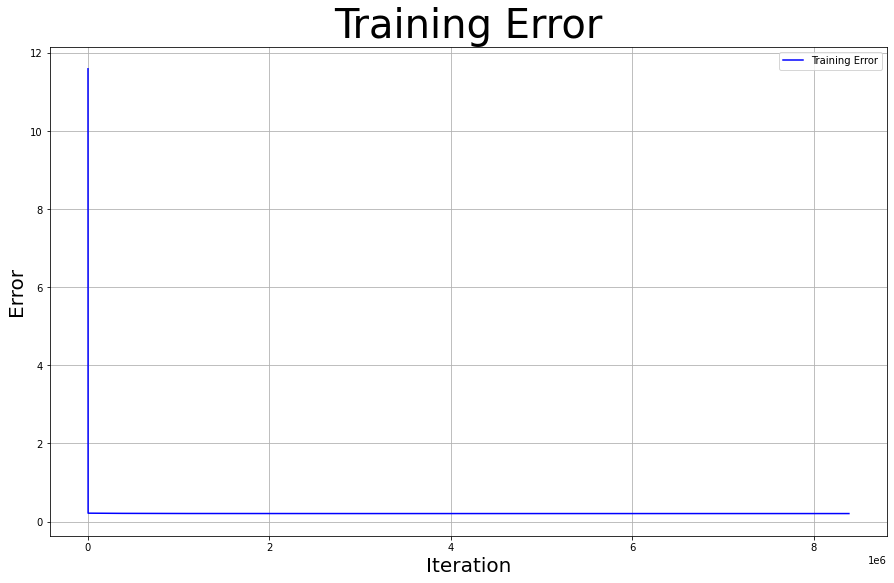

In [10]:
plt.figure(figsize=(15,9))
plt.plot(j_history, color='blue', label='Training Error')
plt.grid()
plt.legend()
plt.title('Training Error', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Error', fontsize=20)

#4. Obtained Classifier

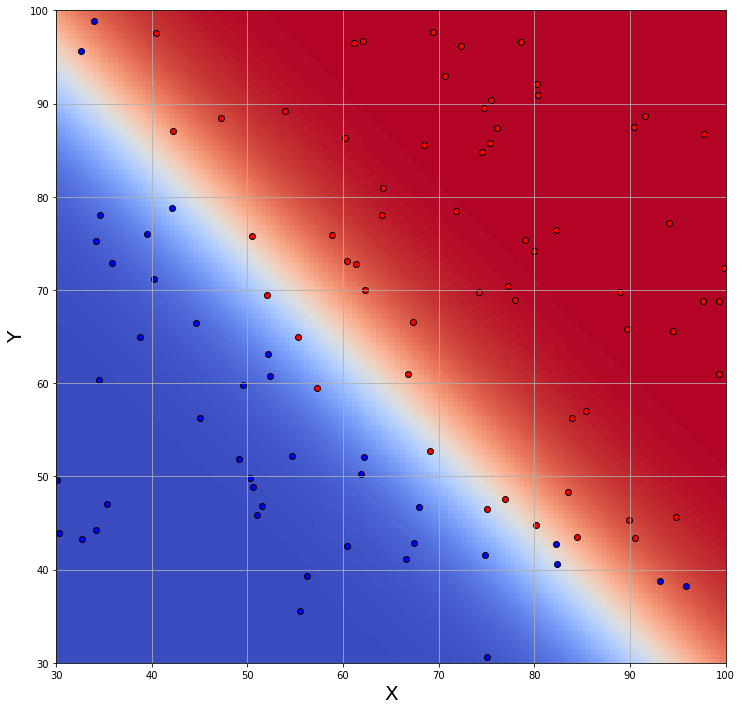

In [11]:
plt.figure(figsize=(12,12))
plt.pcolor(x_range, y_range, classifier_colormap, cmap='coolwarm')
plt.scatter(x_label0, y_label0, c='b', label='Label 0', edgecolors='black')
plt.scatter(x_label1, y_label1, c='r', label='Label 1', edgecolors='black')
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.grid()
plt.show()